In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd


In [35]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sta365 dataset.csv')

In [36]:
dataframe

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [37]:
new_df=dataframe
category = {'Graduate': 1, 'Dropout':0}
new_df['Target'] = new_df['Target'].map(category)

In [39]:
New_Data_Frame  = dataframe[['Gender','Debtor','Previous qualification']]
New_Data_Frame.insert(0,'ones',1)
New_Data_Frame.describe()

,ones,Gender,Debtor,Previous qualification
count,4424.0,4424.000000,4424.000000,4424.000000
mean,1.0,0.351718,0.113698,2.531420
std,0.0,0.477560,0.317480,3.963707
min,1.0,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000
50%,1.0,0.000000,0.000000,1.000000
75%,1.0,1.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,17.000000


In [ ]:
import pymc as pm; import numpy as np
n,p=4424,4; X,y= New_Data_Frame,new_df['Target']
with pm.Model() as logistic_model:
    # Priors for the regression coefficients
    betas = pm.MvNormal('betas', mu=np.zeros(p), cov=np.eye(p), shape=(p))
    # Linear combination of features and weights
    linear_comb = pm.math.dot(X, betas)
    # Using a logit link function
    likelihood = pm.math.sigmoid(linear_comb)  # Logit link function
    # Bernoulli likelihood
    y_obs = pm.Bernoulli('y_obs', p=likelihood, observed=y)
with logistic_model:
    idata = pm.sample()

/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1302: RuntimeWarning: invalid value encountered in cast
  data = convert_observed_data(data).astype(rv_var.dtype)
/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1316: ImputationWarning: Data in y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


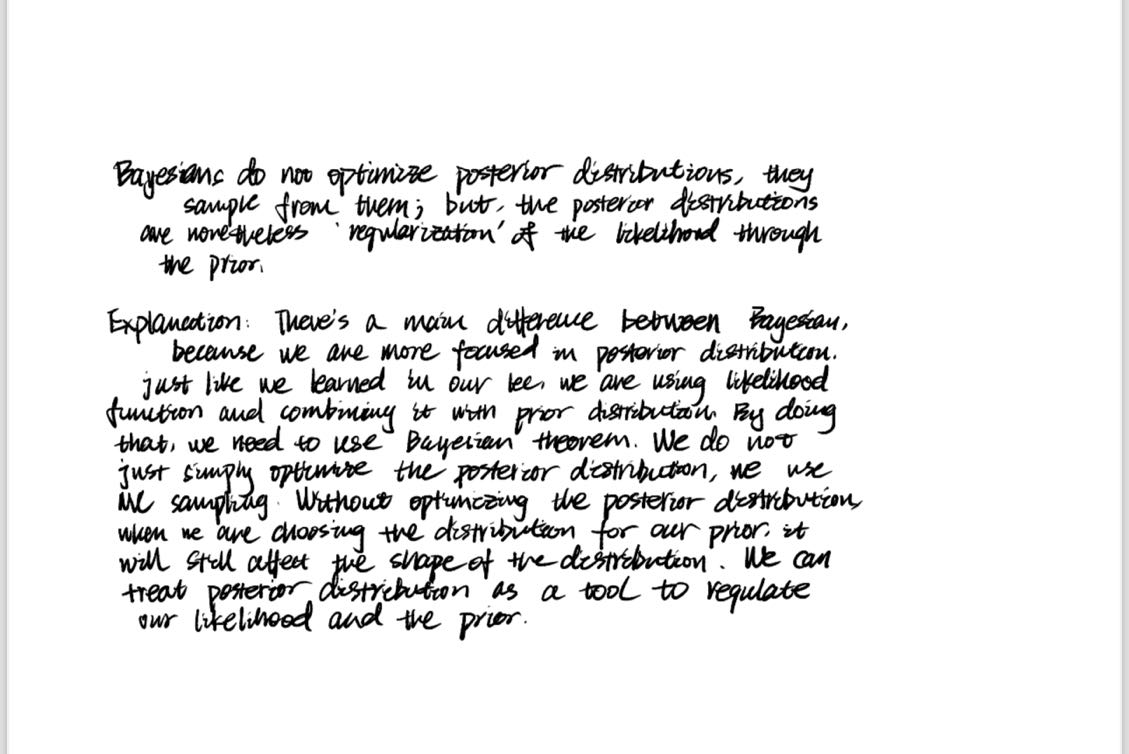